In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Definition of linear relationship: We will use single continuous input that is linearly related to trend 

$$ \mu = \beta_0 + \beta_1 \times X $$

Read the dataset of mastercard dividend

In [2]:
df_mastercard = pd.read_csv('/Users/maheshg/Library/CloudStorage/OneDrive-Microsoft365/Sample Datasets Kaggle/Finance Datasets/MastercardDataset/Mastercard_stock_dividends.csv')

In [3]:
df_mastercard_new = pd.DataFrame([df_mastercard.Dividends])

In [4]:
df_mastercard_new.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
Dividends,0.009,0.009,0.015,0.015,0.015,0.015,0.015,0.015,0.015,0.015,...,0.49,0.57,0.57,0.57,0.57,0.66,0.66,0.66,0.66,0.76


In [5]:
df_mastercard_new.T

,Dividends
0,0.009
1,0.009
2,0.015
3,0.015
4,0.015
...,...
69,0.660
70,0.660
71,0.660
72,0.660


Assumption of Slope and Intercept Value based on the market index 

In [6]:
my_slope = 0.10
my_intercept = 0.5

Calculate the trend or average output of the above dataframe:

In [7]:
df_mastercard_new.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
Dividends,0.009,0.009,0.015,0.015,0.015,0.015,0.015,0.015,0.015,0.015,...,0.49,0.57,0.57,0.57,0.57,0.66,0.66,0.66,0.66,0.76


In [8]:
df_mastercard_new = df_mastercard_new.T

In [9]:
df_mastercard_new.head()

,Dividends
0,0.009
1,0.009
2,0.015
3,0.015
4,0.015


In [10]:
df_mastercard_new.shape

(74, 1)

In [11]:
df_mastercard_new['trend'] = my_slope + my_intercept * df_mastercard_new

In [12]:
df_mastercard_new.head()

,Dividends,trend
0,0.009,0.1045
1,0.009,0.1045
2,0.015,0.1075
3,0.015,0.1075
4,0.015,0.1075


In [13]:
sns.set_style('whitegrid')

Using Seaborn Package 

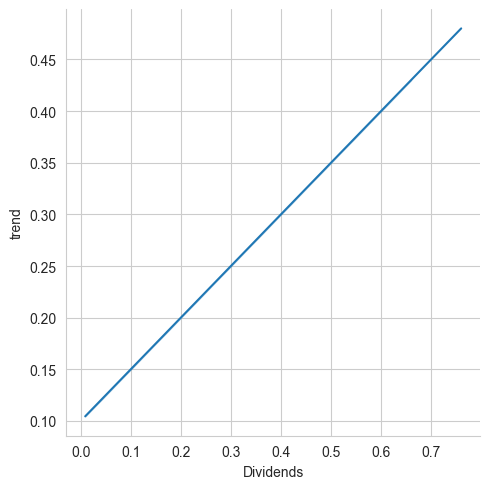

In [14]:
sns.relplot(data=df_mastercard_new, x = 'Dividends', y = 'trend', kind='line')
plt.show()

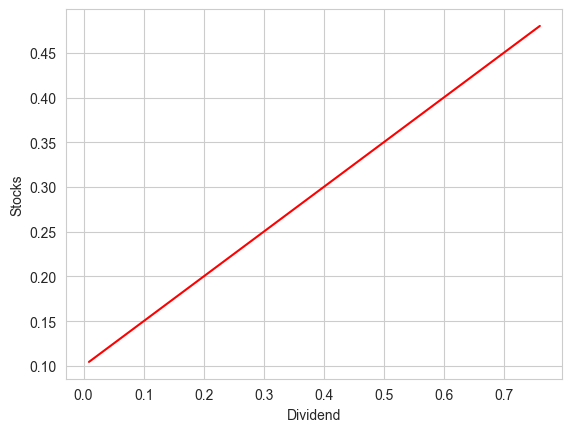

In [15]:
fig, ax = plt.subplots()

ax.plot(df_mastercard_new.Dividends, df_mastercard_new.trend, color = 'r')
ax.set_xlabel('Dividend')
ax.set_ylabel('Stocks')
plt.show()

In [16]:
my_sigma = 0.152

1 Sigma Rule :

In [17]:
df_mastercard_new['lwr_obs_68'] = df_mastercard_new.trend - my_sigma
df_mastercard_new['upr_obs_68'] = df_mastercard_new.trend + my_sigma
 

2 Sigma Rule:

In [18]:
df_mastercard_new['lwr_obs_95'] = df_mastercard_new.trend - 2 * my_sigma
df_mastercard_new['upr_obs_95'] = df_mastercard_new.trend + 2 * my_sigma

In [19]:
df_mastercard_new

,Dividends,trend,lwr_obs_68,upr_obs_68,lwr_obs_95,upr_obs_95
0,0.009,0.1045,-0.0475,0.2565,-0.1995,0.4085
1,0.009,0.1045,-0.0475,0.2565,-0.1995,0.4085
2,0.015,0.1075,-0.0445,0.2595,-0.1965,0.4115
3,0.015,0.1075,-0.0445,0.2595,-0.1965,0.4115
4,0.015,0.1075,-0.0445,0.2595,-0.1965,0.4115
...,...,...,...,...,...,...
69,0.660,0.4300,0.2780,0.5820,0.1260,0.7340
70,0.660,0.4300,0.2780,0.5820,0.1260,0.7340
71,0.660,0.4300,0.2780,0.5820,0.1260,0.7340
72,0.660,0.4300,0.2780,0.5820,0.1260,0.7340


Visualize the uncertainty level of variation from this dataset!

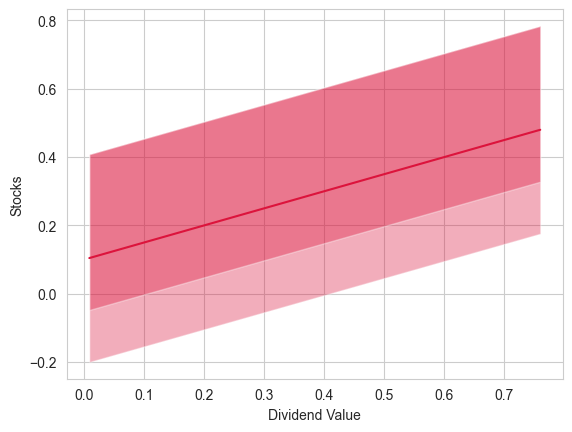

In [20]:
fig, ax = plt.subplots()

### True Trend 
ax.plot(df_mastercard_new.Dividends, df_mastercard_new.trend, color = 'crimson', linewidth = 1.5)

### Variation around the trend line using 2 sigma interval 
ax.fill_between(df_mastercard_new.Dividends, df_mastercard_new.lwr_obs_95, df_mastercard_new.upr_obs_95, facecolor = 'crimson', alpha = 0.35)


### Variation around the trend line using 1 sigma interval 
ax.fill_between(df_mastercard_new.Dividends, df_mastercard_new.lwr_obs_68, df_mastercard_new.upr_obs_95,facecolor = 'crimson', alpha = 0.35)

### Set Labels
ax.set_xlabel('Dividend Value')
ax.set_ylabel('Stocks')

### Show the Plot 
plt.show()

Generate the random output data and performing the trend line with true scope and true sigma with an assumption 

In [21]:
df_mastercard_new = pd.DataFrame({'x': np.linspace(-3,3,num=9)})

In [22]:
df_mastercard_new

,x
0,-3.00
1,-2.25
2,-1.50
3,-0.75
4,0.00
5,0.75
6,1.50
7,2.25
8,3.00


In [23]:
type(df_mastercard_new)

pandas.core.frame.DataFrame

In [24]:
df_mastercard_new['trend'] = my_intercept + my_slope * df_mastercard_new.x

In [25]:
df_mastercard_new

,x,trend
0,-3.00,0.200
1,-2.25,0.275
2,-1.50,0.350
3,-0.75,0.425
4,0.00,0.500
5,0.75,0.575
6,1.50,0.650
7,2.25,0.725
8,3.00,0.800


In [26]:
rg = np.random.default_rng(2100)

In [27]:
df_mastercard_new['y'] = rg.normal(loc=df_mastercard_new.trend, scale=my_sigma, size = df_mastercard_new.shape[0])

In [28]:
df_mastercard_new

,x,trend,y
0,-3.00,0.200,0.355686
1,-2.25,0.275,0.011482
2,-1.50,0.350,0.336427
3,-0.75,0.425,0.258750
4,0.00,0.500,0.548791
5,0.75,0.575,0.407313
6,1.50,0.650,0.532049
7,2.25,0.725,0.674889
8,3.00,0.800,0.579505


In [29]:
df_mastercard_new['true_intercept'] = my_intercept
df_mastercard_new['true_slope'] = my_slope
df_mastercard_new['true_sigma'] = my_sigma

In [30]:
df_mastercard_new

,x,trend,y,true_intercept,true_slope,true_sigma
0,-3.00,0.200,0.355686,0.5,0.1,0.152
1,-2.25,0.275,0.011482,0.5,0.1,0.152
2,-1.50,0.350,0.336427,0.5,0.1,0.152
3,-0.75,0.425,0.258750,0.5,0.1,0.152
4,0.00,0.500,0.548791,0.5,0.1,0.152
5,0.75,0.575,0.407313,0.5,0.1,0.152
6,1.50,0.650,0.532049,0.5,0.1,0.152
7,2.25,0.725,0.674889,0.5,0.1,0.152
8,3.00,0.800,0.579505,0.5,0.1,0.152


Reviewing the non linear relationship, here the trend is linearly related with an unknown intercept and slope 

$$\mu = \beta_0 + \beta_1 \times \sin(x) $$

Visualizing the behaviour patter with an assumption of slope and intercept 

In [31]:
my_intercept = 0.25
my_slope = -2.25

In [32]:
df_mastercard_new = pd.DataFrame({'x':np.linspace(-3.14159, +3.14159, num=101)})

In [33]:
df_mastercard_new

,x
0,-3.141590
1,-3.078758
2,-3.015926
3,-2.953095
4,-2.890263
...,...
96,2.890263
97,2.953095
98,3.015926
99,3.078758


In [34]:
df_mastercard_new['trend'] = my_intercept + my_slope * df_mastercard_new.x

In [35]:
df_mastercard_new

,x,trend
0,-3.141590,7.318577
1,-3.078758,7.177206
2,-3.015926,7.035834
3,-2.953095,6.894463
4,-2.890263,6.753091
...,...,...
96,2.890263,-6.253091
97,2.953095,-6.394463
98,3.015926,-6.535834
99,3.078758,-6.677206


In [36]:
df_mastercard_new['y'] = rg.normal(loc=df_mastercard_new.trend, scale=my_sigma, size = df_mastercard_new.shape[0])

In [37]:
df_mastercard_new 

,x,trend,y
0,-3.141590,7.318577,7.481079
1,-3.078758,7.177206,7.146439
2,-3.015926,7.035834,6.840362
3,-2.953095,6.894463,6.865173
4,-2.890263,6.753091,6.567861
...,...,...,...
96,2.890263,-6.253091,-6.403818
97,2.953095,-6.394463,-6.634789
98,3.015926,-6.535834,-6.471781
99,3.078758,-6.677206,-7.001039


In [38]:
df_mastercard_new['trend'] = my_intercept + my_slope * np.sin(df_mastercard_new.x)

In [39]:
sns.set_style('whitegrid')

In [40]:
df_mastercard_new

,x,trend,y
0,-3.141590,0.250006,7.481079
1,-3.078758,0.391285,7.146439
2,-3.015926,0.532005,6.840362
3,-2.953095,0.671613,6.865173
4,-2.890263,0.809558,6.567861
...,...,...,...
96,2.890263,-0.309558,-6.403818
97,2.953095,-0.171613,-6.634789
98,3.015926,-0.032005,-6.471781
99,3.078758,0.108715,-7.001039


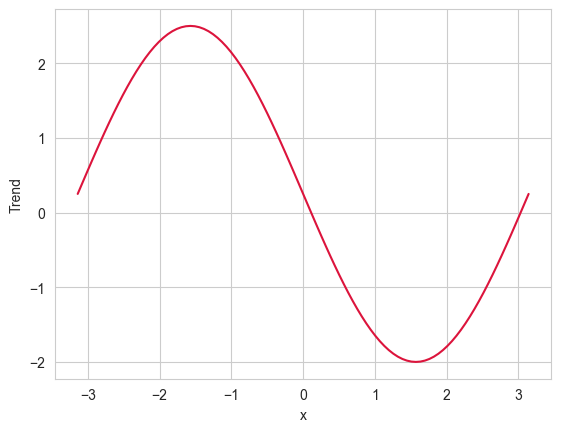

In [41]:
fig, ax = plt.subplots()

ax.plot(df_mastercard_new.x, df_mastercard_new.trend, color = 'crimson',linewidth = 1.5)
ax.set_xlabel('x')
ax.set_ylabel('Trend')
plt.show()

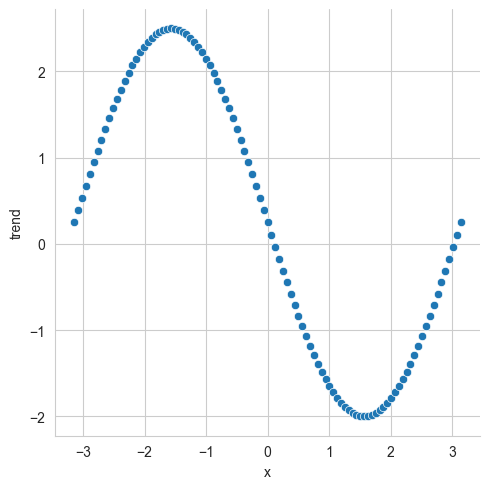

In [42]:
sns.relplot(data=df_mastercard_new, x = 'x', y= 'trend')
plt.show()

Considering Sigma Value as 0.55, this gives the uncertainty around the trend line and dividend details 

In [43]:
my_sigma = 0.55

In [44]:
df_mastercard_new['obs_lwr_68'] = df_mastercard_new.trend - my_sigma
df_mastercard_new['obs_upr_68'] = df_mastercard_new.trend + my_sigma

In [45]:
df_mastercard_new['obs_lwr_95'] = df_mastercard_new.trend - 2* my_sigma
df_mastercard_new['obs_upr_95'] = df_mastercard_new.trend + 2* my_sigma 

In [46]:
df_mastercard_new

,x,trend,y,obs_lwr_68,obs_upr_68,obs_lwr_95,obs_upr_95
0,-3.141590,0.250006,7.481079,-0.299994,0.800006,-0.849994,1.350006
1,-3.078758,0.391285,7.146439,-0.158715,0.941285,-0.708715,1.491285
2,-3.015926,0.532005,6.840362,-0.017995,1.082005,-0.567995,1.632005
3,-2.953095,0.671613,6.865173,0.121613,1.221613,-0.428387,1.771613
4,-2.890263,0.809558,6.567861,0.259558,1.359558,-0.290442,1.909558
...,...,...,...,...,...,...,...
96,2.890263,-0.309558,-6.403818,-0.859558,0.240442,-1.409558,0.790442
97,2.953095,-0.171613,-6.634789,-0.721613,0.378387,-1.271613,0.928387
98,3.015926,-0.032005,-6.471781,-0.582005,0.517995,-1.132005,1.067995
99,3.078758,0.108715,-7.001039,-0.441285,0.658715,-0.991285,1.208715


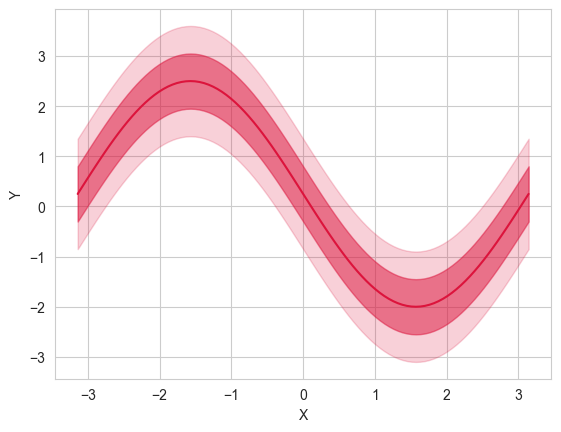

In [47]:
fig, ax = plt.subplots()

### True Trend 
ax.plot(df_mastercard_new.x, df_mastercard_new.trend, color = 'crimson', linewidth = 1.5)

### Variation around the trend -2 sigma interval 
ax.fill_between(df_mastercard_new.x, df_mastercard_new.obs_lwr_95, df_mastercard_new.obs_upr_95, color = 'crimson', alpha = 0.2)

### Variation around the trend - 1 sigma interval
ax.fill_between(df_mastercard_new.x, df_mastercard_new.obs_lwr_68, df_mastercard_new.obs_upr_68, color = 'crimson', alpha = 0.5)

### Plot the data
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

Linear Model Fitting

In [48]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

import seaborn as sns

In [49]:
%whos

Variable            Type         Data/Info
------------------------------------------
ax                  Axes         Axes(0.125,0.11;0.775x0.77)
df_mastercard       DataFrame                             <...>\n\n[74 rows x 2 columns]
df_mastercard_new   DataFrame                x     trend  <...>n\n[101 rows x 7 columns]
fig                 Figure       Figure(640x480)
my_intercept        float        0.25
my_sigma            float        0.55
my_slope            float        -2.25
np                  module       <module 'numpy' from '/Us<...>kages/numpy/__init__.py'>
pd                  module       <module 'pandas' from '/U<...>ages/pandas/__init__.py'>
plt                 module       <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
rg                  Generator    Generator(PCG64)
sns                 module       <module 'seaborn' from '/<...>ges/seaborn/__init__.py'>


In [50]:
df_mastercard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       74 non-null     object 
 1   Dividends  74 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.3+ KB


In [51]:
df_mastercard_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   x           101 non-null    float64
 1   trend       101 non-null    float64
 2   y           101 non-null    float64
 3   obs_lwr_68  101 non-null    float64
 4   obs_upr_68  101 non-null    float64
 5   obs_lwr_95  101 non-null    float64
 6   obs_upr_95  101 non-null    float64
dtypes: float64(7)
memory usage: 5.6 KB


In [52]:
df_mastercard_new


,x,trend,y,obs_lwr_68,obs_upr_68,obs_lwr_95,obs_upr_95
0,-3.141590,0.250006,7.481079,-0.299994,0.800006,-0.849994,1.350006
1,-3.078758,0.391285,7.146439,-0.158715,0.941285,-0.708715,1.491285
2,-3.015926,0.532005,6.840362,-0.017995,1.082005,-0.567995,1.632005
3,-2.953095,0.671613,6.865173,0.121613,1.221613,-0.428387,1.771613
4,-2.890263,0.809558,6.567861,0.259558,1.359558,-0.290442,1.909558
...,...,...,...,...,...,...,...
96,2.890263,-0.309558,-6.403818,-0.859558,0.240442,-1.409558,0.790442
97,2.953095,-0.171613,-6.634789,-0.721613,0.378387,-1.271613,0.928387
98,3.015926,-0.032005,-6.471781,-0.582005,0.517995,-1.132005,1.067995
99,3.078758,0.108715,-7.001039,-0.441285,0.658715,-0.991285,1.208715


We will fit the linear model between input (x) and output(y) : 'Output ~ Input'

In [54]:
import statsmodels.formula.api as smf

In [55]:
lm_fit = smf.ols(formula='y ~ x', data=df_mastercard_new).fit()

In [56]:
type(lm_fit)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [57]:
dir(lm_fit)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_get_wald_nonlinear',
 '_is_nested',
 '_transform_predict_exog',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_predi

In [58]:
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 8.546e+04
Date:                Thu, 15 May 2025   Prob (F-statistic):          3.46e-147
Time:                        22:19:12   Log-Likelihood:                 54.648
No. Observations:                 101   AIC:                            -105.3
Df Residuals:                      99   BIC:                            -100.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2708      0.014     19.132      0.000       0.243       0.299
x             -2.2593      0.008   -292.344      0.000      -2.275      -2.244
==============================================================================
Omnibus:                        0.934   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.627   Jarque-Bera (JB):                0.928
Skew:                          -0.059   Prob(JB):                        0.629
Kurtosis:                       2.545   Cond. No.                         1.83
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Note : 
Linear Model Formula: 

$$\mu = \beta_0 + \beta_1 \times X $$

In [59]:
lm_fit.params

Intercept    0.270846
x           -2.259253
dtype: float64

Standard error in the estimate is contained in '.bse' attribute. Most common standard error interval is +/- 2 standard error 

In [61]:
lm_fit.bse

Intercept    0.014157
x            0.007728
dtype: float64

In [62]:
lm_fit.params - 2 * lm_fit.bse

Intercept    0.242533
x           -2.274709
dtype: float64

In [63]:
lm_fit.params + 2 * lm_fit.bse

Intercept    0.299159
x           -2.243797
dtype: float64

In [64]:
lm_fit.conf_int()

,0,1
Intercept,0.242756,0.298936
x,-2.274587,-2.243919


In [65]:
type(lm_fit.conf_int())

pandas.core.frame.DataFrame

In [66]:
coef_fit_info = lm_fit.conf_int() .\
rename(columns = {0:'CI_Lower', 1 : 'CI_Upper'})

In [67]:
coef_fit_info

,CI_Lower,CI_Upper
Intercept,0.242756,0.298936
x,-2.274587,-2.243919


In [68]:
coef_fit_info['estimate'] = lm_fit.params

In [69]:
coef_fit_info['estimate_se'] = lm_fit.bse

In [70]:
coef_fit_info

,CI_Lower,CI_Upper,estimate,estimate_se
Intercept,0.242756,0.298936,0.270846,0.014157
x,-2.274587,-2.243919,-2.259253,0.007728


In [71]:
coef_fit_info.index

Index(['Intercept', 'x'], dtype='object')

Extracting the p values 

In [72]:
lm_fit.pvalues

Intercept     4.979157e-35
x            3.458040e-147
dtype: float64

In [73]:
lm_fit.pvalues < 0.05

Intercept    True
x            True
dtype: bool

In [74]:
coef_fit_info

,CI_Lower,CI_Upper,estimate,estimate_se
Intercept,0.242756,0.298936,0.270846,0.014157
x,-2.274587,-2.243919,-2.259253,0.007728


In [75]:
lm_fit.params

Intercept    0.270846
x           -2.259253
dtype: float64

In [76]:
lm_fit.bse

Intercept    0.014157
x            0.007728
dtype: float64

In [77]:
lm_fit.conf_int()

,0,1
Intercept,0.242756,0.298936
x,-2.274587,-2.243919


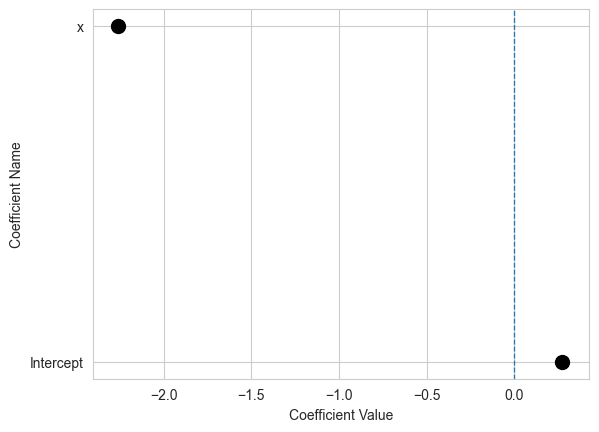

In [78]:
fig, ax = plt.subplots()

### Use the error methods to show the estimates and CI as error bars 
### Create Horizontal Error Bar 
ax.errorbar(y = coef_fit_info.index, 
            x = coef_fit_info.estimate, 
            xerr=2 * coef_fit_info.estimate_se,
            fmt='o', color = 'k', linewidth = 2, ms = 10)

### Include Vertical line: 
ax.axvline(x = 0, linestyle = '--', linewidth = 0.95, ms = 10)

### Set the axis label : 
ax.set_xlabel("Coefficient Value")
ax.set_ylabel("Coefficient Name")

### Show the plot 
plt.show()

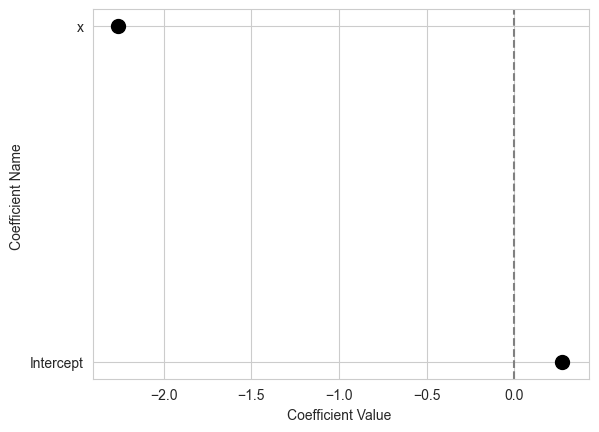

In [88]:
fig, ax = plt.subplots()

### 95% CI around the estimate 
ax.errorbar(y = lm_fit.params.index,
            x = lm_fit.params,
            xerr= 2* lm_fit.bse, 
            fmt = 'o', color = 'k', elinewidth = 4, ms = 10)

### Reference Line 
ax.axvline(x = 0, linestyle = '--', color = 'grey')

### Axis label 
ax.set_xlabel('Coefficient Value ')
ax.set_ylabel('Coefficient Name ')


### Use the plot
plt.show()

In [89]:
lm_fit.conf_int()

,0,1
Intercept,0.242756,0.298936
x,-2.274587,-2.243919


In [90]:
coef_fit_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, Intercept to x
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CI_Lower     2 non-null      float64
 1   CI_Upper     2 non-null      float64
 2   estimate     2 non-null      float64
 3   estimate_se  2 non-null      float64
 4   lower_error  2 non-null      float64
 5   upper_error  2 non-null      float64
dtypes: float64(6)
memory usage: 220.0+ bytes


In [91]:
coef_fit_info

,CI_Lower,CI_Upper,estimate,estimate_se,lower_error,upper_error
Intercept,0.242756,0.298936,0.270846,0.014157,0.028090,0.028090
x,-2.274587,-2.243919,-2.259253,0.007728,0.015334,0.015334


We need to calculate the lower and upper change on the error based on the average

In [92]:
coef_fit_info['lower_error'] = coef_fit_info.estimate - coef_fit_info.CI_Lower
coef_fit_info['upper_error'] = coef_fit_info.CI_Upper - coef_fit_info.estimate

In [93]:
coef_fit_info

,CI_Lower,CI_Upper,estimate,estimate_se,lower_error,upper_error
Intercept,0.242756,0.298936,0.270846,0.014157,0.028090,0.028090
x,-2.274587,-2.243919,-2.259253,0.007728,0.015334,0.015334


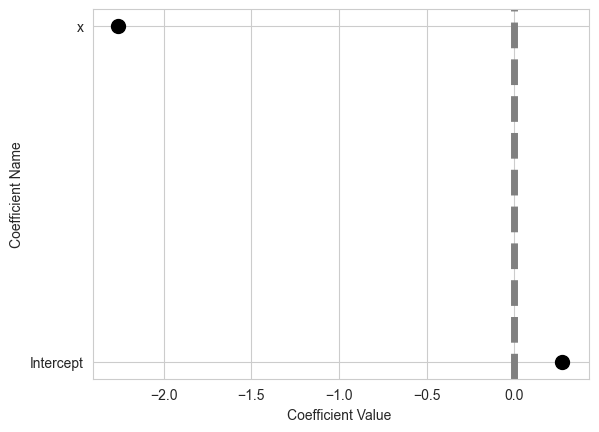

In [94]:
fig, ax = plt.subplots()

ax.errorbar(y = coef_fit_info.index, 
            x = coef_fit_info.estimate, 
            xerr=[coef_fit_info.lower_error, coef_fit_info.upper_error],
            fmt='o', color = 'k', elinewidth=3, ms = 10)

ax.axvline(x = 0, linestyle = '--', linewidth = 5, color = 'grey')

ax.set_xlabel('Coefficient Value ')
ax.set_ylabel('Coefficient Name')
plt.show()

In [95]:
df_mastercard_new

,x,trend,y,obs_lwr_68,obs_upr_68,obs_lwr_95,obs_upr_95
0,-3.141590,0.250006,7.481079,-0.299994,0.800006,-0.849994,1.350006
1,-3.078758,0.391285,7.146439,-0.158715,0.941285,-0.708715,1.491285
2,-3.015926,0.532005,6.840362,-0.017995,1.082005,-0.567995,1.632005
3,-2.953095,0.671613,6.865173,0.121613,1.221613,-0.428387,1.771613
4,-2.890263,0.809558,6.567861,0.259558,1.359558,-0.290442,1.909558
...,...,...,...,...,...,...,...
96,2.890263,-0.309558,-6.403818,-0.859558,0.240442,-1.409558,0.790442
97,2.953095,-0.171613,-6.634789,-0.721613,0.378387,-1.271613,0.928387
98,3.015926,-0.032005,-6.471781,-0.582005,0.517995,-1.132005,1.067995
99,3.078758,0.108715,-7.001039,-0.441285,0.658715,-0.991285,1.208715


In [103]:
df_mastercard_new

,x,trend,y,obs_lwr_68,obs_upr_68,obs_lwr_95,obs_upr_95
0,-3.141590,0.250006,7.481079,-0.299994,0.800006,-0.849994,1.350006
1,-3.078758,0.391285,7.146439,-0.158715,0.941285,-0.708715,1.491285
2,-3.015926,0.532005,6.840362,-0.017995,1.082005,-0.567995,1.632005
3,-2.953095,0.671613,6.865173,0.121613,1.221613,-0.428387,1.771613
4,-2.890263,0.809558,6.567861,0.259558,1.359558,-0.290442,1.909558
...,...,...,...,...,...,...,...
96,2.890263,-0.309558,-6.403818,-0.859558,0.240442,-1.409558,0.790442
97,2.953095,-0.171613,-6.634789,-0.721613,0.378387,-1.271613,0.928387
98,3.015926,-0.032005,-6.471781,-0.582005,0.517995,-1.132005,1.067995
99,3.078758,0.108715,-7.001039,-0.441285,0.658715,-0.991285,1.208715
